In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Basic Extration of the Data

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [10]:
df.std

<bound method NDFrame._add_numeric_operations.<locals>.std of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [17]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
df.drop(columns = ['CustomerID'],inplace = True)

In [22]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [26]:
type(df)

pandas.core.frame.DataFrame

In [27]:
nom_col = [0]

In [28]:
print('Duplicate Rows Count : ', df.duplicated().sum())

df=df.drop_duplicates(keep="first")

Duplicate Rows Count :  0


In [29]:
df["Gender"] = df["Gender"].astype('category').cat.codes
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
#using ML Alogirthms

In [68]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import itertools
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import davies_bouldin_score, silhouette_score
km = KMeans(n_clusters = 3)

In [31]:
k = range(1,10)

In [33]:
df['Gender']= pd.get_dummies(df.Gender,drop_first = True)
km.fit(df)

KMeans(n_clusters=3)

In [34]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [35]:
km.cluster_centers_

array([[ 0.40650407, 40.32520325, 44.15447154, 49.82926829],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.52631579, 40.39473684, 87.        , 18.63157895]])

In [36]:
km.n_iter_

3

In [38]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

In [41]:
def pca(df, n):
    
    if type(n) == int:
        
        pca = PCA(n_components = n )
        pca.fit(df)
        df_pca = pca.transform(data)
        return df_pca
        
    else:
        return data

In [48]:
data = df

In [49]:
df_pca = pca(df, 2)
df_pca = pd.DataFrame(df_pca, columns = ['P1','P2'])
df_pca.head()

,P1,P2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412


In [ ]:
#plotting them in graph

Text(0, 0.5, 'PCA 2')

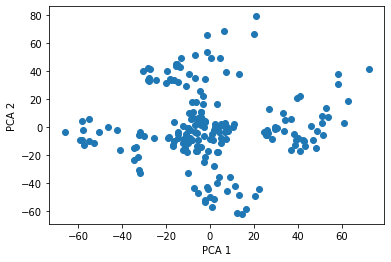

In [52]:
plt.scatter(df_pca.P1, df_pca.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [58]:
def cluster_Wcss(data, k ):
       
    wcss = []
    
    for i in range(1, k):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10,5))
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

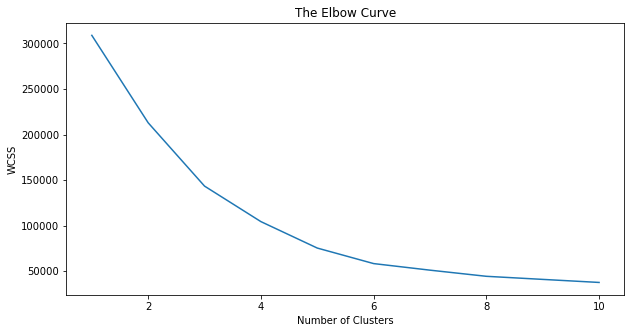

In [59]:
cluster_Wcss(df, 11)

In [72]:
param_data = { 'n' : [2,'False'] }
param_data = [dict(zip(param_data.keys(), v)) for v in itertools.product(*param_data.values())]

param_model = { 
    'n_clusters': [3, 4, 5 , 6],
    'init' : ['k-means++'],
    'random_state' :[16]
}
param_model = [dict(zip(param_model.keys(), v)) for v in itertools.product(*param_model.values())]

In [73]:
def cluster(data, param_data, param_model):

    last =[]
    
    for dp in param_data:

        X = pca(data, dp['n'])
        X = pd.DataFrame(X) 
        for mp in param_model:

            model = KMeans(**mp)

            y_means = model.fit_predict(X)
            centers = model.cluster_centers_
            
            silhouette = silhouette_score(X, y_means)
            davies_bouldin = davies_bouldin_score(X, y_means)
            
            res = {}
            res['Model'] = 'Kmeans'
            res['Random_State'] = mp['random_state']
            
            res['Pca'] = dp['n']
            res['Params'] = mp
            res['Centers'] = centers
            res['Silhouette'] = silhouette
            res['Davies_Bouldin'] = davies_bouldin
               
            last.append(res)
            
    result = pd.DataFrame(last, columns=['Model','Pca','Params', 'Centers', 'Silhouette', 'Davies_Bouldin'])
    
    return result

In [74]:
result =  cluster(df,  param_data, param_model)
result = result.sort_values(by=['Silhouette'], ascending=False)
result.head()

,Model,Pca,Params,Centers,Silhouette,Davies_Bouldin
2,Kmeans,2,"{'n_clusters': 5, 'init': 'k-means++', 'random...","[[41.551038751053376, 1.8708754080538759], [-4...",0.552626,0.584301
3,Kmeans,2,"{'n_clusters': 6, 'init': 'k-means++', 'random...","[[54.80661771836184, 18.992161509065845], [-44...",0.534448,0.663913
1,Kmeans,2,"{'n_clusters': 4, 'init': 'k-means++', 'random...","[[-13.167019014458564, -4.623026887458536], [4...",0.499151,0.671398
7,Kmeans,False,"{'n_clusters': 6, 'init': 'k-means++', 'random...","[[0.4444444444444445, 56.155555555555544, 53.3...",0.452055,0.747522
0,Kmeans,2,"{'n_clusters': 3, 'init': 'k-means++', 'random...","[[41.551038751053376, 1.8708754080538759], [-1...",0.451053,0.731013


In [77]:
# Best Results

bp = result.Params[2]
bn = result.Pca[2]
bc = result.Centers[2]

In [78]:
# Training the model with the best parameters

X = pca(df, bn)
X = pd.DataFrame(X, columns = ['P1','P2'])

model = KMeans(**bp) 

y_means = model.fit_predict(X)

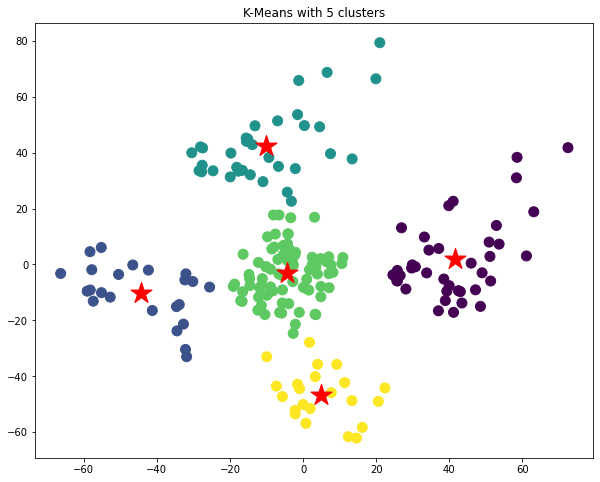

In [79]:
#Visualization of the result

plt.figure(figsize=(10, 8))

plt.title('K-Means with 5 clusters')

plt.scatter(X.P1, X.P2, c=y_means, s=100)

plt.scatter(bc[:,0], bc[:,1], color='red', marker='*', s=500) 

In [82]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd

In [83]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

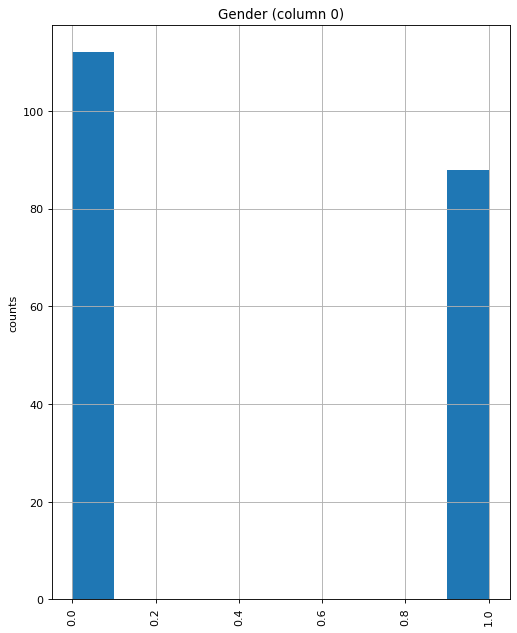

In [85]:
plotPerColumnDistribution(df, 10, 5)

In [91]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

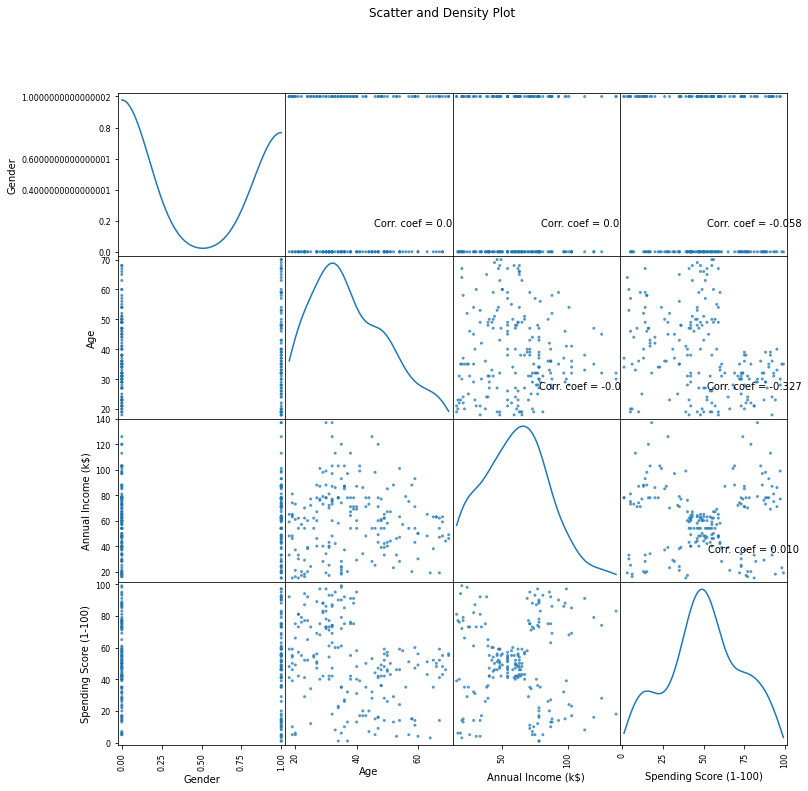

In [87]:
plotScatterMatrix(df, 12, 10)

In [ ]:
#Accuracy checking and error determination using KNN alogrithm.

In [97]:
X = data.iloc[:, 0:-1].values  
y = data.iloc[:, -1].values 

In [98]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90,
                                                    test_size=0.10 , random_state = 0)

In [99]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [100]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=12)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)


In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + ' %.')
 
error = []

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 

Text(0, 0.5, 'Mean Error')

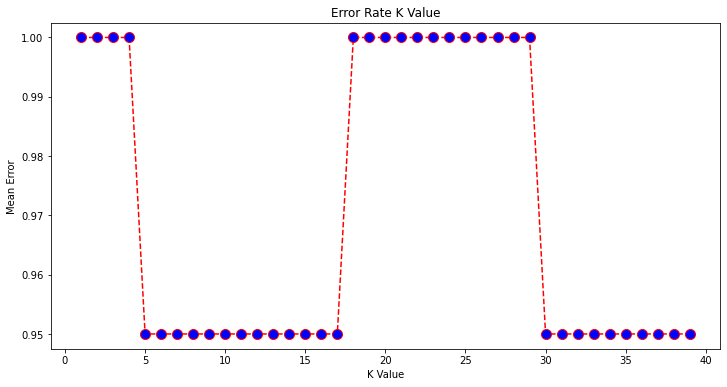

In [102]:
for i in range(1, 40):  
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    pred_i = classifier.predict(X_test)
    error.append(np.mean(pred_i != y_test))



    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  